<a href="https://colab.research.google.com/github/rland93/pendulum/blob/master/notebooks/nocontroller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf pendulum
!git clone https://github.com/rland93/pendulum.git

Cloning into 'pendulum'...
remote: Enumerating objects: 353, done.
remote: Counting objects: 100% (353/353), done.
remote: Compressing objects: 100% (256/256), done.
remote: Total 353 (delta 150), reused 272 (delta 89), pack-reused 0
Receiving objects: 100% (353/353), 6.46 MiB | 17.73 MiB/s, done.
Resolving deltas: 100% (150/150), done.


First, we set the context so that our notebook can execute the module.

In [2]:
import sys
sys.path.append('pendulum/')
print(sys.executable)
print(sys.version)
%matplotlib inline

/usr/bin/python3
3.7.10 (default, May  3 2021, 02:48:31) 
[GCC 7.5.0]


We run imports. `controller` has the controllers, `pendulum` has the system model, `simulate` is a wrapper for the simulation. `Visualizer` displays the pendulum animation.

In [3]:
import numpy as np
from pendulum import controller, pendulum, sim
from pendulum.viz import Visualizer
from IPython.display import HTML
import matplotlib.pyplot as plt

We set some parameters. State variables are given as a 4x1 array of $$[x, \dot{x}, \theta, \dot{\theta}]$$ 

Angles are given in radians, so we can see below that our $\theta$ has a slight offset, which makes the system unstable at first.

In [4]:
dt = 0.01 # simulation timestep
t_final = 5 # total simulation time, seconds
pend = pendulum.Pendulum(
    2.0, # large mass
    3.0, # small mass
    2.0, # length (meters)
    initial_state=np.array([0,0,-.1,0]) # initial state
)
# force function takes a time argument and returns a force. For now, let's say no external forces.
force_fn = lambda t: 0 

Now, let's create a controller. To start, we can make an empty controller with no control action inside. In this controller we have an `__init__` method for setting controller parameters, and a policy method for actually implementing the policy. The `policy` method takes the system state, time, and timestep as arguments and returns a scalar `action` (as well as a dict of data values, for passing additional data about controller calculations through to results). For now, the `data` dict is empty.

To try out different controllers, try altering the logic inside of `policy`.

In [6]:
class NoController(controller.Controller):
    def __init__(self):
        pass
    
    def policy(self, state, t, dt, plot=False):
        return 0, {}

cont = NoController()

Next, we create the simulation object. This is the wrapper for the simulation.

In [7]:
simulation = sim.Simulation(dt, t_final, force_fn)

Here, we actually run the simulation by calling the `simulate` method of the simulation we created above. We pass the specific controller and pendulum into this method. This method returns the simulation data in a dataframe, `results`.

In [8]:
results = simulation.simulate(pend, cont)

100%|██████████| 501/501 [00:00<00:00, 1837.55it/s]


The results from the simulation has all of the simulation information in it. It's a `pandas` `DataFrame` so it has nice API compatibility with `matplotlib`, enabling us to easily plot the simulation information. Here, each state variable is stored under `state` in the multi-indexed dataframe, so we can plot each by iterating through the multi-index:

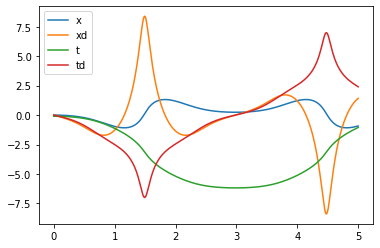

In [9]:
fig, ax = plt.subplots()
for s in results['state']:
    ax.plot(results[('state', s)], label=s)
ax.legend()

Finally, we can create an animation of the pendulum by first creating a `Visualizer` object and then calling its `animate` method, which returns a matplotlib animation.

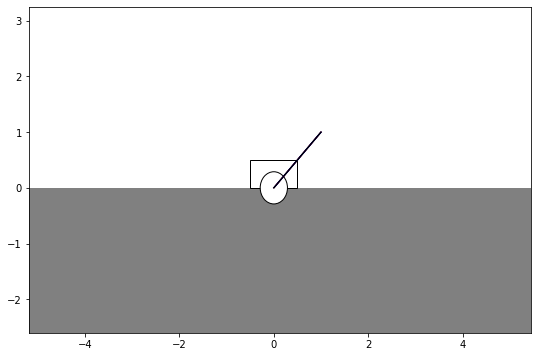

In [10]:
visualizer = Visualizer(results, pend, speed=2)
anim = visualizer.animate()

Matplotlib will typically attempt to display the animation we created above inline whenever we call `animate`. However, if that doesn't work for some reason (or, it can be slow on some systems) we can pre-render an HTML5 video with the results of our simulation:

In [11]:
HTML(anim.to_html5_video())